<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Feature_Engineering_Techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering Thecniques

## Label Encoding

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
url = 'https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho'
od.download(url)

Skipping, found downloaded files in "./vehicle-dataset-from-cardekho" (use force=True to force download)


In [4]:
cars = pd.read_csv('./vehicle-dataset-from-cardekho/cars.csv')
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
cars.shape

(301, 9)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
cars.select_dtypes(include='object').describe().T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


In [9]:
data = cars.drop(columns=['Year', 'Selling_Price'])
target = cars.Selling_Price

data.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,4.15,5200,Petrol,Dealer,Manual,0
4,swift,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
target

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [11]:
data.isna().sum()

Car_Name         0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
target.isna().sum()

0

## Output Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31a05d23d0>,
      dtype=object)

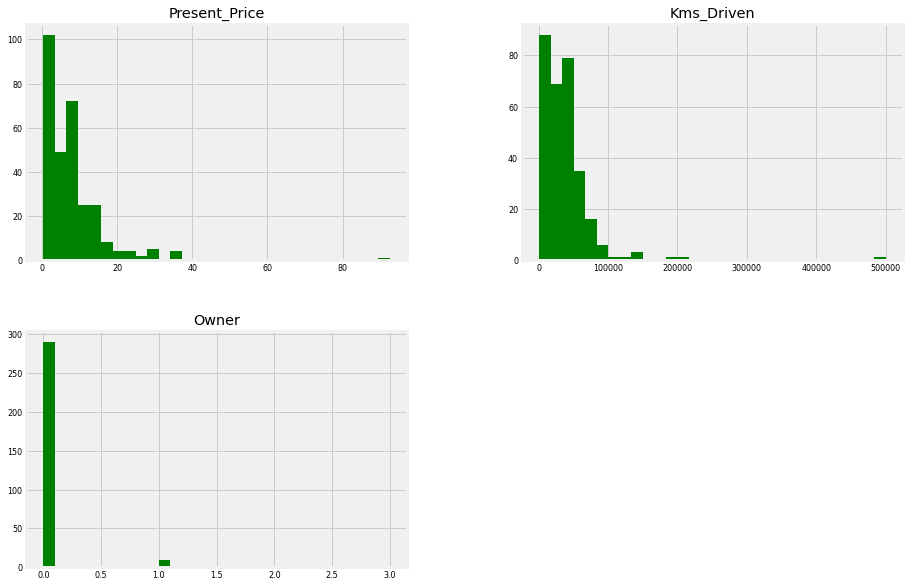

In [13]:
data.hist(figsize=(14, 10), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

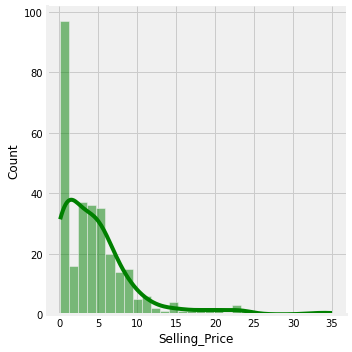

In [14]:
sns.displot(target, color='g', bins=30,kde=True)

## Outliers detection

In [15]:
cars.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Transmission'),
 Text(0.5, 1.0, 'Count/Transmission Distribution')]

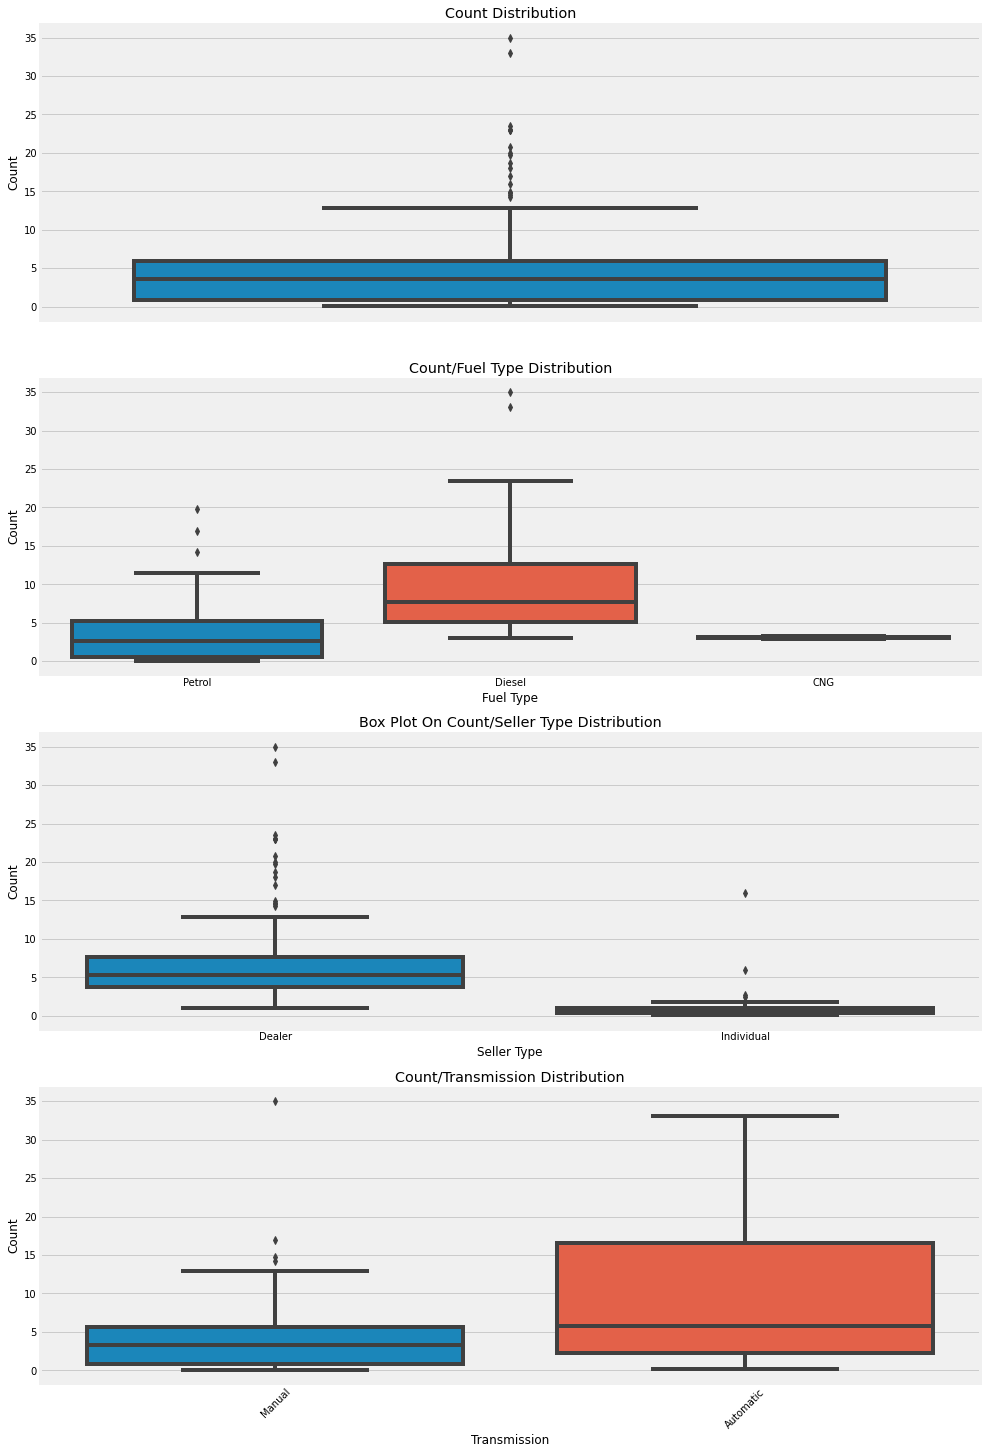

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(15, 25)
plt.xticks(rotation = 45)
sns.boxplot(data=cars,y="Selling_Price",orient="v",ax=axes[0])
sns.boxplot(data=cars,y="Selling_Price",x="Fuel_Type",orient="v",ax=axes[1])
sns.boxplot(data=cars,y="Selling_Price",x="Seller_Type",orient="v",ax=axes[2])
sns.boxplot(data=cars,y="Selling_Price",x="Transmission",orient="v",ax=axes[3])


axes[0].set(ylabel='Count',title="Count Distribution")
axes[1].set(xlabel='Fuel Type', ylabel='Count',title="Count/Fuel Type Distribution")
axes[2].set(xlabel='Seller Type', ylabel='Count',title="Box Plot On Count/Seller Type Distribution")
axes[3].set(xlabel='Transmission', ylabel='Count',title="Count/Transmission Distribution")

## Correlation Analysis

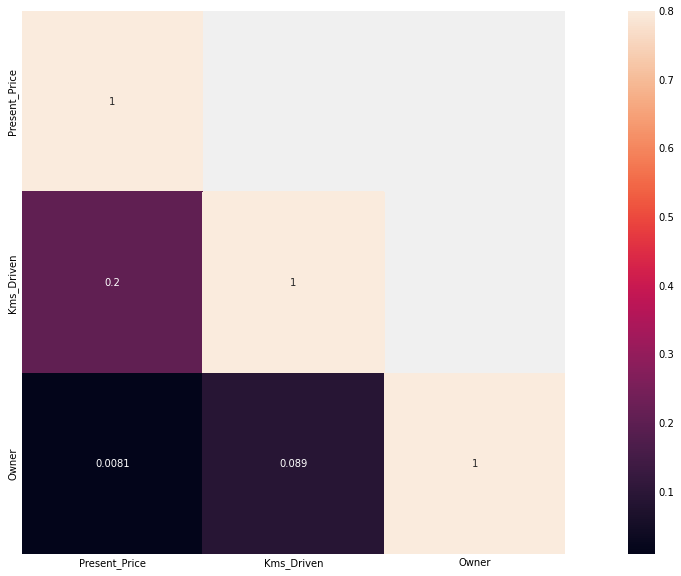

In [17]:
corr_mat = data.select_dtypes(include='number').corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask=mask,vmax=.8, square=True,annot=True)

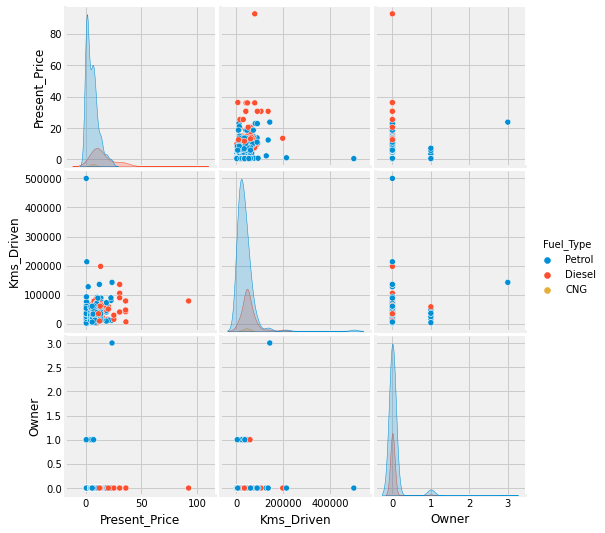

In [18]:
sns.pairplot(data, hue='Fuel_Type')

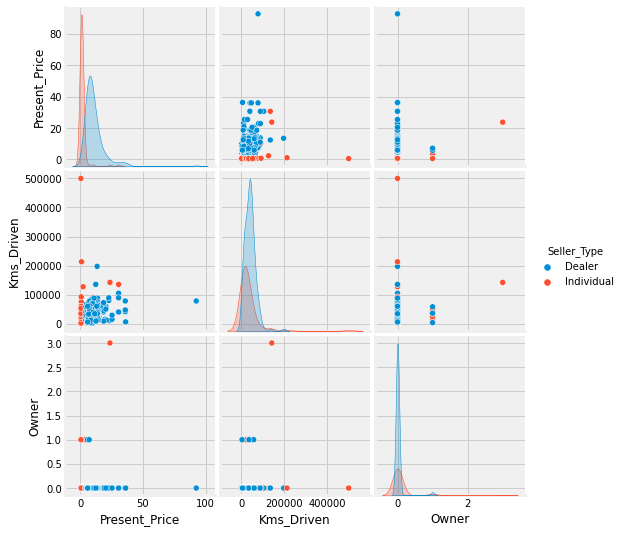

In [19]:
sns.pairplot(data, hue='Seller_Type')

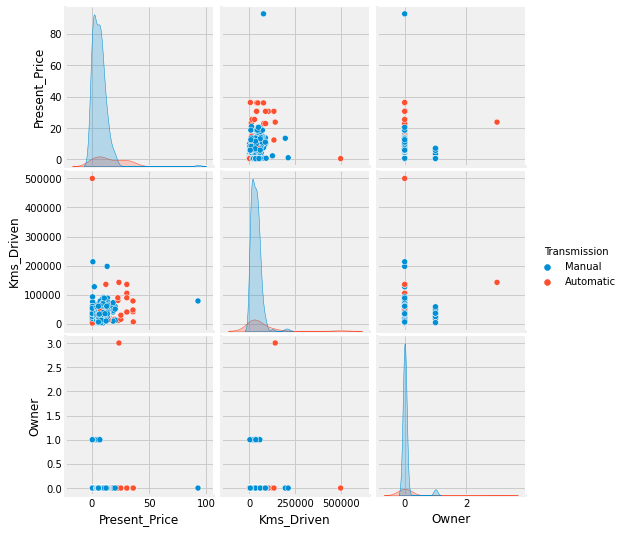

In [20]:
sns.pairplot(data, hue='Transmission')